# <center> Итоговая работа Python-13
# <center> Визуализация

In [2]:
# Импортируем все необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px

# считываем файл с данными
churn_data = pd.read_csv('churn.csv', sep=',')

# просматриваем исходные данный, имеющиеся для визуализации и анализа
display(churn_data.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### <center> ЗАДАНИЕ 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

Text(0.5, 1.0, 'Соотношение лояльных и ушедших клиентов')

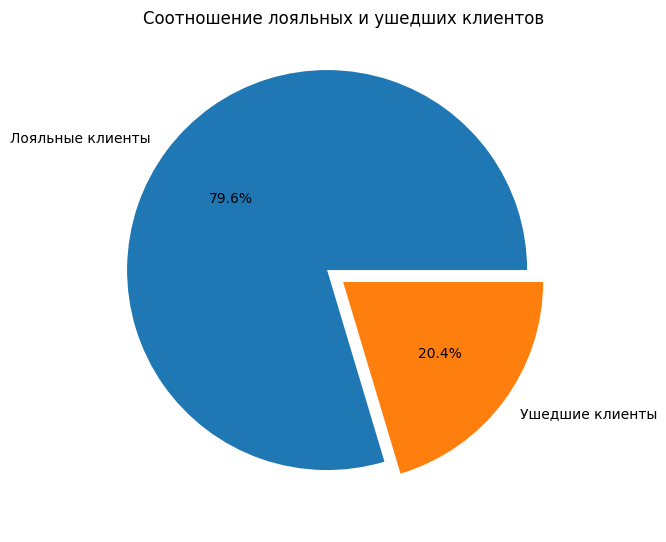

In [3]:
churn_data1=churn_data.copy() #создаем копию данных, чтобы не повредить исходные данные совершая обработку данных 
pie_data_1=churn_data1['Exited'].value_counts() #Определяем количество клиентов банка по статусу лояльности

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    pie_data_1,
    labels=["Лояльные клиенты", "Ушедшие клиенты"],
    autopct='%.1f%%',
    explode = [0.1, 0]);
axes.set_title('Соотношение лояльных и ушедших клиентов')


Из графика видно, что ушедшие клиенты составляют пятую часть всех клиентов, на мой взгляд это очень много и банку следует позаботиться о мерах по сокращению оттока клиентов как можно раньше. Жаль, что нет данных о новых клиентах банка, поступивших за рассмотриваемый период, они бы позволили оценить на сколько критическим для банка станет сохранение подобной тенденции оттока  клиентов в будущем.

### <center> ЗАДАНИЕ 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [4]:
box_data_2=churn_data1[churn_data1["Balance"] > 2500]
fig=px.box(data_frame=box_data_2,
           x='Balance',
           title="Распределение клиентов")

fig.show()

Из графика видно, что основная часть клиентов имеют на счетах суммы от 100,2 до 139,5 тыс. долларов. При этом минимальный балланс составляет 3,8 тыс. долларов, а максимальный - 250,9 тыс долларов.  
Вывод: Положение медианы и усов диаграммы говорит о симетричном распределении баланса клиентов. Само по себе это знание не показывает связь с оттоком клиентов, а значит нужно исследовать данные дальше.

### <center> ЗАДАНИЕ 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [9]:
churn_data2=churn_data.copy() # создадим копию, чтобы не вносить изменения в исходные данные
churn_data2['Exited']=churn_data2['Exited'].astype(str)
churn_data2.loc[churn_data2['Exited'] == '0', 'Exited'] = 'Лояльные клиенты'
churn_data2.loc[churn_data2['Exited'] == '1', 'Exited'] = 'Ушедшие клиенты'
fig=px.box(data_frame=churn_data2,
           x='Balance',
           color='Exited',
           title="Распределение распредление балланса клиентов с учетом статуса лояльности")

fig.show()


***Описание графика и выводы делаются на основании предположения, что "ушедшие клиенты", это клиенты, которые пользовались различными продуктами банка, и получили статус "ушедшие" после отказа от услуг банка всех кроме депозитных счетов.***

Ящик иллюстрирующий лояльных клиентов симметричен, интерквантильный размах обоих ящиков лежжит в пределах от 99,1 тыс. долларов до 139,8 тыс. долларов. Однако выбросов больше среди данных о балансе по ушедшим клиентам.

Выводы: Из графика видно, что многие ушедшие клиенты продолжают хранить деньги в данном банке, а значит доверяют ему. Так, например, максимальная сумма на счете составила  250,9 тыс. долларов, и принадлежит именно ушедшему клиенту. Данный показатель сообщает, что банку следует позаботиться о привлекательности других предлагаемых продуктов, а тот факт, что клиенты продолжают хранить деньги в этом банке может свидетельствовать о высокой вероятности возвращения ушедших клиентов. Так как у ушедших клиентов с положительным балансом имеется доверие к самому банку, то на возвращение их потребуется меньше усилий, чем на привлечение такого же количества новых клиентов.

### <center> ЗАДАНИЕ 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

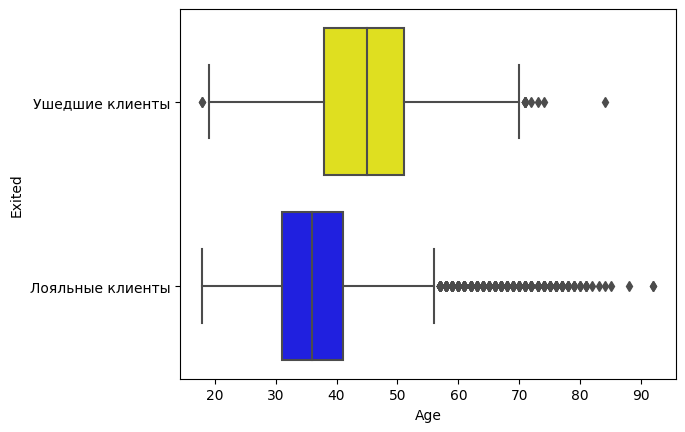

In [16]:
boxplot = sns.boxplot(
data=churn_data2,
y='Exited',
x='Age',
orient='h',
palette=['yellow', 'blue']
)

Из графика видно, что больший размах возраста лояльных клиентов. При этом ни у одной из групп выбросов не наблюдается. Сами ящики у обоих групп являются симметричными. 
Вывод: банку следует обратить внимание на группу клиентов в возрасте от 32 до 61, так они чаще других уходят.

### <center> ЗАДАНИЕ 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [ ]:
lin_data_5=churn_data2.groupby(['CreditScore','EstimatedSalary'], as_index=False)['Exited'].value_counts()
fig =px.scatter(
    data_frame=lin_data_5, 
    x='CreditScore', 
    y='EstimatedSalary',
    color='Exited',
    height=900, 
    width=1000,
    title='Взаимосвязь кредитного рейтинга и предполагаемой заработной платы с учетов статуса лояльности' #заголовок
)
fig.show()

По диаграмме рассеяния явной зависимости кредитного рейтинга и предполагаемой заработной платы не прослеживается, однако видно, что редкие клиенты с наибболее низким рейтингом все же из числа ушедших клиентов.

### <center> ЗАДАНИЕ 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [ ]:
bar_data_6=churn_data2.groupby(['Gender','Exited'],as_index=False)['CustomerId'].count()
fig =px.bar(
    data_frame=bar_data_6, 
    x='CustomerId', 
    y='Gender',
    color='Exited',
    text_auto=True,
    text='Gender',
    orientation='h',
    labels=dict(CustomerId="Количество клиентов банка", Gender="Признак половой принадлежности", Exited="Статус лояльности"),
    height=500, 
    width=1000,
    title='Взаимосвязь кредитного рейтинга и предполагаемой заработной платы с учетов статуса лояльности' #заголовок
)
fig.show()

На графике видно, что среди лояльных клиентов банка больше мужчин, в то время как среди ушедших клиентов больше женщин. Тут есть над чем подумать, так как для успеха маркетинговых мероприятий важно учитывать психологию, а как мы знаем мужчины и женщимы в это плане имеют существенные различия.  

### <center> ЗАДАНИЕ 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

,NumOfProducts,Exited,CustomerId
0,1,Лояльные клиенты,3675
1,1,Ушедшие клиенты,1409
2,2,Лояльные клиенты,4242
3,2,Ушедшие клиенты,348
4,3,Лояльные клиенты,46
5,3,Ушедшие клиенты,220
6,4,Ушедшие клиенты,60


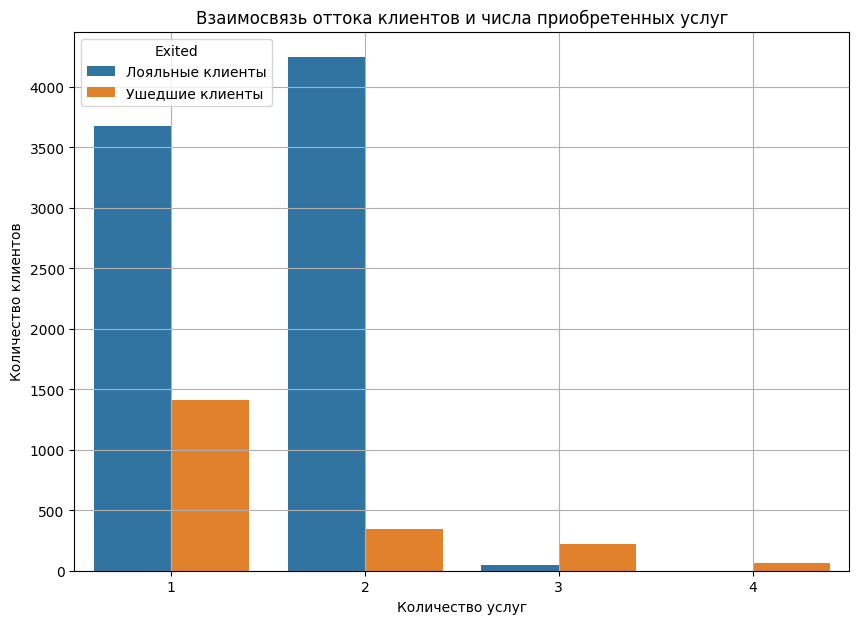

In [ ]:
bar_data_7=churn_data2.groupby(['NumOfProducts','Exited'],as_index=False)['CustomerId'].count()
display(bar_data_7)
fig = plt.figure(figsize=(10, 7))
barplot_7 = sns.barplot(
    data=bar_data_7,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
)
barplot_7.set_title('Взаимосвязь оттока клиентов и числа приобретенных услуг');
barplot_7.set_xlabel('Количество услуг');
barplot_7.set_ylabel('Количество клиентов');
barplot_7.grid()

График очень наглядно демонстрирует взаимосвязь оттока клиентов и количества услуг банка, которые приобрел клиент. Из графика следует, что больше всего ушло клиентов, которые приобрели только одну услугу банка. Если предположить, что услуга была акционной, например "Вклад с повышенной процентной ставкой к юбилею банка" или бесплатная годовая подписка на сервисы банка и фирм-партнеров, или что-то очень выгодное для клиента,  то всерьез говорить о заинтересованности банка именно в этих 1409 клиентах не приходиться. 

Еще внимания заслуживает тот факт, что в целом на набор из 3 и 4 услуг приходится всего 46 лояльных клиентов. 

Мы рассмотриваем международный банк, действующий в Европе, трудно сказать наверняка, будет ли верным мое дальнейшее предположение. В реальной жизни в наше время банки предоставляют большой спектр услуг, в том числе и за пределами чисто финансовых (услуги связи, подписки на онлайн-сервисы, всевозможные виды кредитования и много другое) мы видим, что у данного банка слабо развито пакетное предоставление услуг. И мой совет, проработать это направление. Однако, учитывая все сказанное, эти меры будут больше способствовать привлечению новых криентов, чем препятствовать оттоку лояльных.

### <center> ЗАДАНИЕ 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

,IsActiveMember,Exited,CustomerId
0,0,Лояльные клиенты,3547
1,0,Ушедшие клиенты,1302
2,1,Лояльные клиенты,4416
3,1,Ушедшие клиенты,735


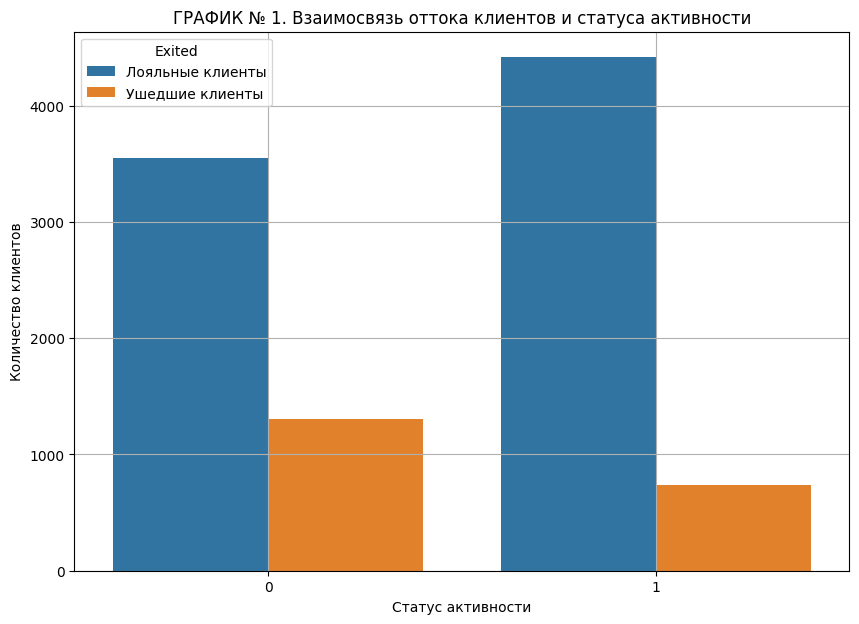

In [ ]:
client=churn_data2.groupby(['IsActiveMember','Exited'],as_index=False)['CustomerId'].count()
display(client)
fig = plt.figure(figsize=(10, 7))
barplot_7 = sns.barplot(
    data=client,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited',
)
barplot_7.set_title('ГРАФИК № 1. Взаимосвязь оттока клиентов и статуса активности');
barplot_7.set_xlabel('Статус активности');
barplot_7.set_ylabel('Количество клиентов');
barplot_7.grid()

,IsActiveMember,CustomerId
0,0,320
1,1,180


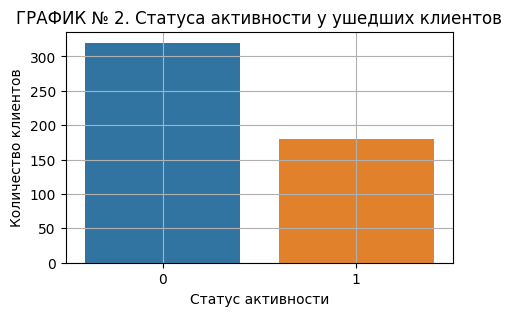

In [ ]:
client_x=churn_data[(churn_data['Balance']<=0)&(churn_data['Exited']==1)]
client=client_x.groupby('IsActiveMember',as_index=False)['CustomerId'].count()
display(client)
fig = plt.figure(figsize=(5, 3))
barplot_7 = sns.barplot(
    data=client,
    x='IsActiveMember',
    y='CustomerId',
    )
barplot_7.set_title('ГРАФИК № 2. Статуса активности у ушедших клиентов');
barplot_7.set_xlabel('Статус активности');
barplot_7.set_ylabel('Количество клиентов');
barplot_7.grid()

Показатель "статус активности" самый загадочный показатель из всей таблици данных, имеющихся в нашем распоряжении. 
Не обладая точными характеристиками данного показателя (иными словами, что он означает) трудно давать какие-либо рекомендации на основе его исследования, однако некоторые предположения всеже можно сделать. 

На графике № 1 сразу бросается в глаза наличие у ушедших клиентов статуса "активный", что на первый взгляд выглядит нелогичным. Однако из предыдущих заданий мы знаем, что многие ушедшие клиенты продолжают хранить деньги на счетах в банке, поэтому можно предположить, что из 735 активных ушедших клиентов часть это те, кто имеет положительный балланс на счете. И тогда наличие статуса "активен" для таких клиентом логичен. Чтобы посмотреть так ли это я построила График № 2, который показывает, что из 735 активных ушедших клиентов только 180 человек не имеют денег на счетах в банке. Я имею не самое подробное представление о составлении банковских отчетов, но могу предположить, что данные 180 клиентов могут быть ошибочными, т.е. существует вероятность, что статус активности указан для них неверно.

На графике № 1 также видно, что отток среди неактивных явно выше чем среди активных, поэтому банку следует направить внимание на неактивных клиентов. Если вспомнить, задание 9.7., то можно сделать вывод, что с увеличением предложений разных пакетов продуктов банка, неактивные клиенты могут стать более активными, что приведет к уменьшению оттока клиентов.

### <center> ЗАДАНИЕ 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
#Получаем таблицу с общим количеством клиентов банка по странам
data_sort_z=churn_data1.groupby('Geography',as_index=False)['CustomerId'].count()
#Получаем таблицу с количеством клиентов по странам в разрезе признака лояльности
data_sort_x=churn_data1.groupby('Geography',as_index=False)['Exited'].value_counts()
#Объединяем две предыдущие таблици по общему признаку "Geography"
data_sort_9=data_sort_z.merge(data_sort_x, on='Geography',how='left')
#Вводим новый признак, в котором содержится доля ушедших клиентов
data_sort_9['data_ex']=data_sort_9['count']/data_sort_9['CustomerId']*100
#отбираем только признаки для ушедших клиентов
data_ex_9=data_sort_9[data_sort_9['Exited']==1]
#Подготавляваем таблицу для создания графика, оставляя только значения для ушедших клиентов

#Создаем график
fig = px.choropleth(
    data_frame=data_ex_9, 
    locations="Geography", 
    locationmode = "country names", 
    color="data_ex", 
    title='Доля ушедших клиентов в разрезе стран', 
    width=800, 
    height=500, 
    color_continuous_midpoint=(4),
    color_continuous_scale='Blues' 
)

fig.show()


На карте видно, что Испания и Франция имеют примерно одинаковую долю ушедших клиентов, в то время как германия имеет показатель в два раза больше. Можно только предположить отличие государственной политики в банковском секторе, проводимой  в Германии от проводимой в других странах.

#### <center> ЗАДАНИЕ 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [ ]:
churn_data_10=churn_data.copy()
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data_10['CreditScoreCat']=churn_data_10['CreditScore'].apply(get_credit_score_cat)
churn_data_sv=churn_data_10.pivot_table(values='Exited',
                                      index='CreditScoreCat',
                                      columns='Tenure',
                                      aggfunc='mean',
                                      fill_value=0)
fig = px.imshow(churn_data_sv, text_auto=True)
fig.show()


Тепловая карта с анотацией очень хорошо читается, на ней отчетливо видно, что клиенты категории "Very Poor", которые пользуются услугами банка менее года уходят чаще всего.

### Выводы по завершению работы над данным проектом. 

Думаю, что в реальных условиях, чтобы разработать мероприияти, направленные на снижения оттока клиентов, банку следует кроме приведенных в данном задании показателей также проанализировать и другие. Например, какими именно услугами пользуются клиенты банка. Также, если посмотреть на кредитный сегмент услуг, и проанализировать сроки на которые предоставляются кредиты, в том числе и ипотечные, возможно установить взаимосвязь примерно такую: "на больший срок предоставлен кредит - меньше вероятность ухода клиента", Кроме того, в заданиях не был рассмотрен такой показатель как наличие кредитных карт у клиентов, а ведь в странах Европы большинство расчетов производится по безналу, есть вероятность, что хорошие условия по кредитным картам для лояльных клиентов у которых их нет, помогут предотвратить их отток.

Еще один момент. В период пандемии возможен естественный уход клиентов за счет общего повышения смертности, хотя подозреваю, что данный показатель не столь существенный, но все же решила его отметить. 